In [3]:
import pandas as pd
Demographics=pd.read_csv('Demographics cleaned - Copy.csv')
Credit=pd.read_csv('Credit Bureau Cleaned.csv')

In [4]:
Demographics_credit=pd.merge(Demographics, Credit, how='outer', on='Application ID')

In [5]:
DC=Demographics_credit.dropna()

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
## describing demographic data
DC.describe()

,Unnamed: 0_x,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,Unnamed: 0_y,No of times 90 DPD or worse in last 6 months,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
count,68705.000000,6.870500e+04,68705.000000,68705.000000,68705.000000,68705.000000,68705.000000,68705.000000,68705.000000,68705.000000,...,68705.000000,68705.000000,68705.000000,68705.000000,68705.000000,68705.000000,68705.000000,6.870500e+04,68705.000000,68705.000000
mean,35024.664362,4.992992e+08,45.017626,2.859108,27.392577,34.632341,34.244815,0.042151,35024.664362,0.251947,...,2.317706,5.866924,1.206026,2.396201,1.782272,3.569056,0.262412,1.266421e+06,8.293676,0.086107
std,20046.172227,2.886631e+08,9.925683,1.385296,15.464944,36.834500,20.351543,0.200936,20046.172227,0.507581,...,2.079105,5.085429,1.354680,2.424200,1.988929,3.618838,0.439948,1.286666e+06,7.138886,0.280524
min,0.000000,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,17831.000000,2.485625e+08,38.000000,2.000000,14.000000,6.000000,17.000000,0.000000,17831.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134500e+05,3.000000,0.000000
50%,35097.000000,4.980661e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,35097.000000,0.000000,...,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779820e+05,6.000000,0.000000
75%,52342.000000,7.503873e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,52342.000000,0.000000,...,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930258e+06,10.000000,0.000000
max,71294.000000,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000,71294.000000,3.000000,...,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000


In [12]:
eda_demographics = pd.DataFrame(DC).copy()

In [11]:
eda_demographics['Performance Tag'].value_counts()

0.0    65809
1.0     2896
Name: Performance Tag, dtype: int64

In [14]:
percent_defaulters = (eda_demographics['Performance Tag'].sum()/eda_demographics['Performance Tag'].count())*100
percent_defaulters

4.215122625718652

In [21]:
## function to carry out univariate analyis of a categorical variable
def plot_categorical_data(df, variable):
    plt.figure(figsize=(20,15))
    
    plt.subplot(2, 2, 1)
    pie_df = pd.DataFrame(df[variable].value_counts())
    plt.title('Pie Plot for '+variable, fontsize = 15)
    plt.pie(pie_df[variable].values, labels = pie_df.index.values, autopct='%1.2f%%', shadow=False, startangle=30)
    plt.axis('equal')    
   
    count_prospects = df.groupby(variable)['Performance Tag'].sum().reset_index(name = 'count_prospects')
    No_of_prospect = df.groupby(variable)['Performance Tag'].count().reset_index(name = 'No_of_prospects')
    agg_No = count_prospects.merge(No_of_prospect, on = variable)
    agg_No['No_non_prospects'] = agg_No['No_of_prospects'] - agg_No['count_prospects']
    agg_No['Default_rate'] = 100*(agg_No['count_prospects']/agg_No['No_of_prospects']).round(4)     
        
    barWidth = 1
    plt.subplot(2, 2, 2)
    plt.title('Stacked Bar Plot for '+variable, fontsize = 15)
    plt.bar(agg_No.index, list(agg_No['No_non_prospects']), color='#7f6d5f', edgecolor='white', 
            width=barWidth, label='Non-defaulter')
    plt.bar(agg_No.index, list(agg_No['count_prospects']), bottom=list(agg_No['No_non_prospects']), color='#557f2d'
            , edgecolor='white', width=barWidth,label='Defaulter')   

    plt.xticks(agg_No.index, list(agg_No[variable]), fontweight='bold', fontsize = 15, rotation=90)
    plt.xlabel(variable, fontsize = 20)
    for i in agg_No.index:
        plt.text(x = i-0.25, y = agg_No['No_of_prospects'][i], s = agg_No['count_prospects'][i],fontsize=10)
        plt.text(x = i-0.5 , y = 1000, s = agg_No['No_non_prospects'][i],fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
    
    plt.subplot(2, 2, 3)
    plt.title('Bar Plot for '+ variable, fontsize = 15)
    sns.barplot(x=variable, y='Default_rate', data=agg_No)
    
    plt.xticks(agg_No.index, list(agg_No[variable].astype('category')), fontweight='bold', fontsize = 15, rotation=90)
    plt.xlabel(variable, fontsize = 15)
    
    for i in agg_No.index:
        plt.text(x = i-0.25, y = 0.25, s = ''+str(agg_No['Default_rate'][i].round(3))+' %',fontsize=15)

    plt.show()
    return agg_No    

In [22]:
## function to carry out univariate analyis of a continuous variable
## and also create bins for the variable so as to cross check with WoE data
def plot_continuous_num_data(df, variable):
    plt.figure(figsize=(30,5))
    
    plt.subplot(1, 3, 1)
    plt.title('Box plot for '+variable, fontweight='bold', fontsize = 15)
    sns.boxplot(y=variable, data=df)
    
    non_default_list = list(df[df.Performance_Tag == 0][variable])
    default_list = list(df[df.Performance_Tag == 1][variable])
    plt.subplot(1, 3, 2)
    plt.title('Stacked Histogram Plot for '+variable, fontweight='bold', fontsize = 15)
    plt.ylabel('count')
    plt.hist([non_default_list,default_list], stacked=True,edgecolor = 'black' , label=['Non-defaulter','Defaulter'])
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
    
    plt.subplot(1, 3, 3)
    plt.title('Stacked Distribution plot for '+variable, fontweight='bold', fontsize = 15)
    sns.distplot(df[variable],rug=True)
    plt.ylabel('frequency')
    plt.show()
    
    df[variable+'_bins'] = pd.qcut(df[variable], 8,duplicates = 'drop')

    return plot_categorical_data(df,variable+'_bins')

In [23]:
## EDA for the Age variable
eda_demographics.Age.describe()

count    68705.000000
mean        45.017626
std          9.925683
min         -3.000000
25%         38.000000
50%         45.000000
75%         53.000000
max         65.000000
Name: Age, dtype: float64

In [24]:
## EDA for the Gender variable
eda_demographics.Gender.value_counts()

M    52472
F    16233
Name: Gender, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

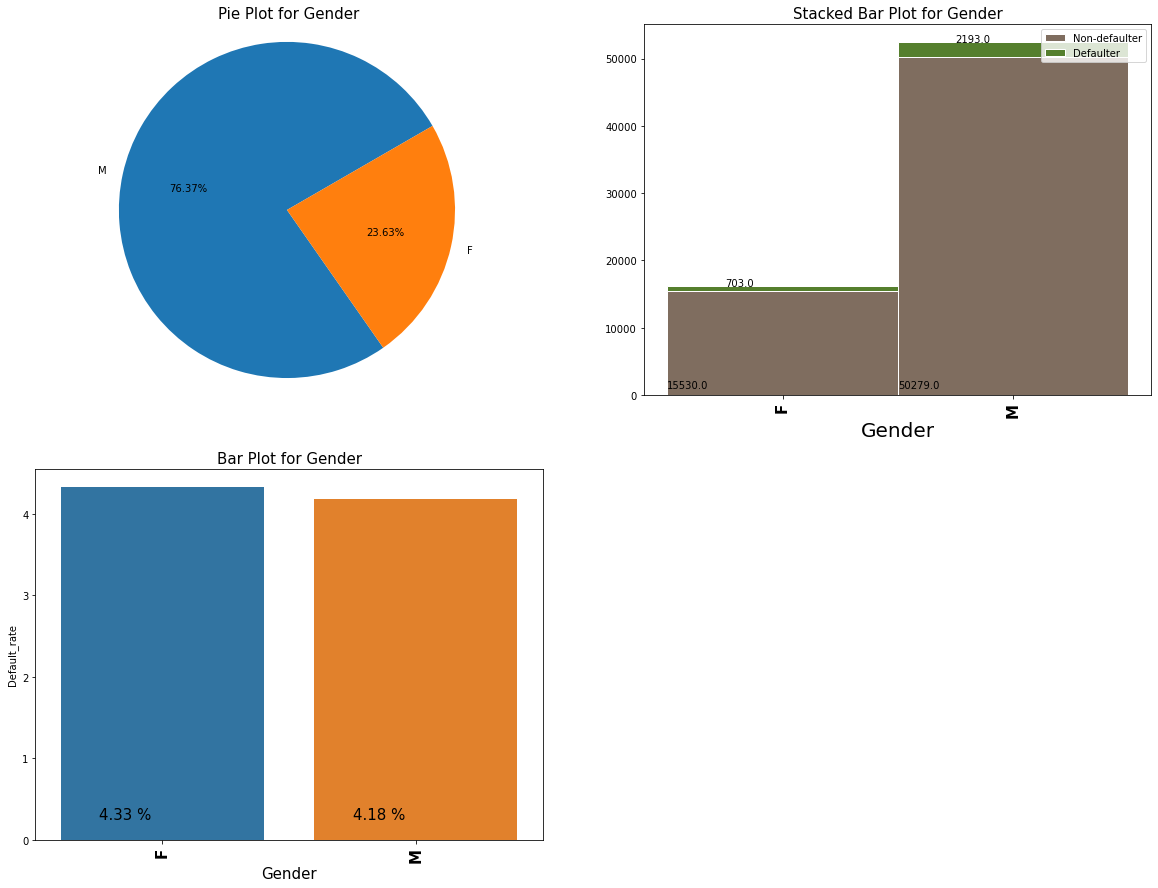

,Gender,count_prospects,No_of_prospects,No_non_prospects,Default_rate
0,F,703.0,16233,15530.0,4.33
1,M,2193.0,52472,50279.0,4.18


In [25]:
plot_categorical_data(eda_demographics, 'Gender')